## Table of Content
 **[Mid-term Project:Supervised Machine Learning](#Mid-term-Project-:-Supervised-Machine-Learning)**
 
  <p>This dataset contains employee information, including their demographics, job role, job satisfaction, work-life balance, and whether they have left the company (attrition).  </p>
 <p>The focus of the task is to build predictive models which can identify which employees are at a higher risk of leaving the company. This could help in taking some proactive measures to retain valuable employees. This dataset is collected for a Human resource application and the source is from Kaggle: https://www.kaggle.com/datasets/itssuru/hr-employee-attrition  
    
    Attrition: Represents the measure of employees leaving a company voluntarily or involuntarily. HR uses the figure to track and understand how things are going at a company


##  Load Code Libraries

In [1]:
import kaggle
import numpy as np
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

## Part 2: Load Dataset

<p>      </p>

In [2]:
import os
from kaggle.api.kaggle_api_extended import KaggleApi

# Initialize Kaggle API
api = KaggleApi()
api.authenticate()

# Define project directory and data path
project_dir = os.path.join(os.getcwd(), "data")
os.makedirs(project_dir, exist_ok=True)

# Kaggle dataset identifier (update with correct dataset ID)
dataset_name = "itssuru/HR-Employee-Attrition"

# Download dataset to the project data directory
api.dataset_download_files(dataset_name, path=project_dir, unzip=True)

print(f"Dataset downloaded and extracted to {project_dir}")


Dataset URL: https://www.kaggle.com/datasets/itssuru/HR-Employee-Attrition
Dataset downloaded and extracted to C:\Users\Acer\Documents\workspace\ml-zoomcamp\mlzoomcamp-midterm-project\notebooks\data


In [3]:
!ls C:\Users\Acer\Documents\workspace\ml-zoomcamp\mlzoomcamp-midterm-project\notebooks\data\

HR-Employee-Attrition.csv


In [4]:
hr = r'C:\Users\Acer\Documents\workspace\ml-zoomcamp\mlzoomcamp-midterm-project\notebooks\data\HR-Employee-Attrition.csv'
df = pd.read_csv(hr)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


##  Load Dataset Summary
<p> The dataset contains information about employees, including their demographics, job role, job satisfaction, work-life balance, and whether they have left the company (attrition).   </p>

## Data Pre-Processing

<p>      </p>

* Check for missing values
* Check for Duplicates, and 
* Check for outliers in the dataset. 
* Finally, address any data quality issues.

In [5]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,1460,1461,1462,1463,1464,1465,1466,1467,1468,1469
Age,41,49,37,33,27,32,59,30,38,36,...,29,50,39,31,26,36,39,27,49,34
Attrition,Yes,No,Yes,No,No,No,No,No,No,No,...,No,Yes,No,No,No,No,No,No,No,No
BusinessTravel,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Rarely,Travel_Frequently,Travel_Rarely,...,Travel_Rarely,Travel_Rarely,Travel_Rarely,Non-Travel,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Rarely,Travel_Frequently,Travel_Rarely
DailyRate,1102,279,1373,1392,591,1005,1324,1358,216,1299,...,468,410,722,325,1167,884,613,155,1023,628
Department,Sales,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,...,Research & Development,Sales,Sales,Research & Development,Sales,Research & Development,Research & Development,Research & Development,Sales,Research & Development
DistanceFromHome,1,8,2,3,2,2,3,24,23,27,...,28,28,24,5,5,23,6,4,2,8
Education,2,1,2,4,1,2,3,1,3,3,...,4,3,1,3,3,2,1,3,3,3
EducationField,Life Sciences,Life Sciences,Other,Life Sciences,Medical,Life Sciences,Medical,Life Sciences,Life Sciences,Medical,...,Medical,Marketing,Marketing,Medical,Other,Medical,Medical,Life Sciences,Medical,Medical
EmployeeCount,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
EmployeeNumber,1,2,4,5,7,8,10,11,12,13,...,2054,2055,2056,2057,2060,2061,2062,2064,2065,2068


In [6]:
df.columns # Examining all the columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [8]:
# Check for missing values
print(df.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [9]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [10]:
df.attrition = (df.attrition == 'yes').astype(int)
df

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,...,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
0,41,1,travel_rarely,1102,sales,1,2,life_sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,travel_frequently,279,research_&_development,8,1,life_sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,travel_rarely,1373,research_&_development,2,2,other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,travel_frequently,1392,research_&_development,3,4,life_sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,travel_rarely,591,research_&_development,2,1,medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,travel_frequently,884,research_&_development,23,2,medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,travel_rarely,613,research_&_development,6,1,medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,travel_rarely,155,research_&_development,4,3,life_sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,travel_frequently,1023,sales,2,3,medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [11]:
df.nunique()

age                           43
attrition                      2
businesstravel                 3
dailyrate                    886
department                     3
distancefromhome              29
education                      5
educationfield                 6
employeecount                  1
employeenumber              1470
environmentsatisfaction        4
gender                         2
hourlyrate                    71
jobinvolvement                 4
joblevel                       5
jobrole                        9
jobsatisfaction                4
maritalstatus                  3
monthlyincome               1349
monthlyrate                 1427
numcompaniesworked            10
over18                         1
overtime                       2
percentsalaryhike             15
performancerating              2
relationshipsatisfaction       4
standardhours                  1
stockoptionlevel               4
totalworkingyears             40
trainingtimeslastyear          7
worklifeba

In [12]:
# Drop all constant attributes (1 from the result about) that will not make a difference to our model description
df.drop(['employeecount', 'over18','standardhours' ],axis=1,inplace=True)


In [13]:
df.columns

Index(['age', 'attrition', 'businesstravel', 'dailyrate', 'department',
       'distancefromhome', 'education', 'educationfield', 'employeenumber',
       'environmentsatisfaction', 'gender', 'hourlyrate', 'jobinvolvement',
       'joblevel', 'jobrole', 'jobsatisfaction', 'maritalstatus',
       'monthlyincome', 'monthlyrate', 'numcompaniesworked', 'overtime',
       'percentsalaryhike', 'performancerating', 'relationshipsatisfaction',
       'stockoptionlevel', 'totalworkingyears', 'trainingtimeslastyear',
       'worklifebalance', 'yearsatcompany', 'yearsincurrentrole',
       'yearssincelastpromotion', 'yearswithcurrmanager'],
      dtype='object')

In [14]:
# Identify categorical and numerical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=['number']).columns.tolist()
num_cols.remove('attrition')  # Remove target variable from numeric columns

## Part 5: Exploratory Data Analysis

<p>      </p>

* Perform EDA on the Dataset
* Look at the target variable (attrition)
* Look at numerical and categorical variables

In [15]:
df.head().T # Dataset exhibit some standardisation - Changed all columns and categorical values into lowercase, 
            # and collected all categorical attributes in an holder variable.

,0,1,2,3,4
age,41,49,37,33,27
attrition,1,0,1,0,0
businesstravel,travel_rarely,travel_frequently,travel_rarely,travel_frequently,travel_rarely
dailyrate,1102,279,1373,1392,591
department,sales,research_&_development,research_&_development,research_&_development,research_&_development
distancefromhome,1,8,2,3,2
education,2,1,2,4,1
educationfield,life_sciences,life_sciences,other,life_sciences,medical
employeenumber,1,2,4,5,7
environmentsatisfaction,2,3,4,4,1


In [16]:
df.describe() # Descriptive Statistics: Calculate summary statistics for numeric variables such as age, distance, from home, and others. 
              # This gives the statistical overview of the dataset.
    # Count:1470 entries or examples for all columns, if any attribute has a different count value, can imply missed data in our dataset. 

,age,attrition,dailyrate,distancefromhome,education,employeenumber,environmentsatisfaction,hourlyrate,jobinvolvement,joblevel,...,performancerating,relationshipsatisfaction,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,1024.865306,2.721769,65.891156,2.729932,2.063946,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,602.024335,1.093082,20.329428,0.711561,1.106940,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,491.250000,2.000000,48.000000,2.000000,1.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,1555.750000,4.000000,83.750000,3.000000,3.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


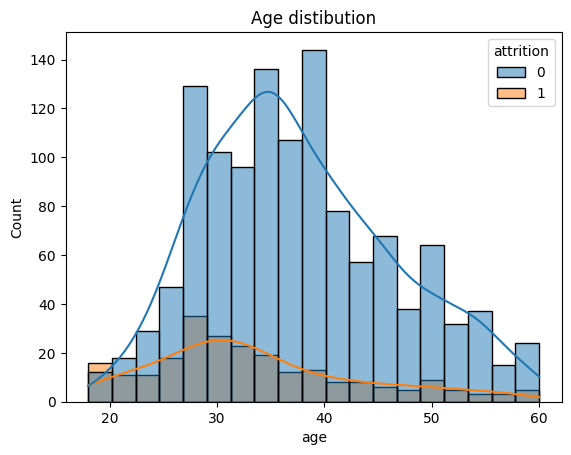

In [17]:
sns.histplot(data=df,x='age',hue='attrition',kde=True)
plt.title(label='Age distibution')
plt.show();

# Start and Retirement ages are the focus here 

## Summary: Prepare Data 

* Minimum start Age is 18
* Retirement Age is 60
* Attrition seemed to occur with younger age ranging from 18
* Observed a peak at age 30.
* Declining move from age 40 through to ago 60, which seems like the retirement age.
* Plot of 2 graphs campared indicates an imbalanced Class data as it seems proportion of employees leaving is low compared to those that stay perphaps until retirement age.

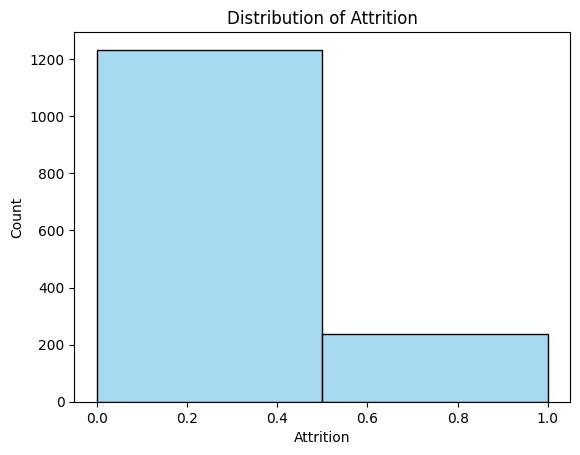

In [18]:
# Create a histogram of the 'Attrition' target variable
sns.histplot(data=df, x='attrition', bins=2, kde=False, color='skyblue')

# Add labels and a title to the plot
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.title('Distribution of Attrition')



# Show the plot
plt.show();

### Attrition percentage on the dataset is 17% approximately

In [19]:
num_cols

['age',
 'dailyrate',
 'distancefromhome',
 'education',
 'employeenumber',
 'environmentsatisfaction',
 'hourlyrate',
 'jobinvolvement',
 'joblevel',
 'jobsatisfaction',
 'monthlyincome',
 'monthlyrate',
 'numcompaniesworked',
 'percentsalaryhike',
 'performancerating',
 'relationshipsatisfaction',
 'stockoptionlevel',
 'totalworkingyears',
 'trainingtimeslastyear',
 'worklifebalance',
 'yearsatcompany',
 'yearsincurrentrole',
 'yearssincelastpromotion',
 'yearswithcurrmanager']

## Validation Framework
* Perform the train/validation/test split with Scikit-Learn

In [20]:
from sklearn.model_selection import train_test_split
# Set random seed
SEED = 42

In [21]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=SEED)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=SEED)

In [22]:
len(df_train), len(df_val), len(df_test)

(882, 294, 294)

In [23]:
len(df_full_train)

1176

In [24]:
 df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [25]:
y_train = df_train.attrition.values
y_val = df_val.attrition.values
y_test = df_test.attrition.values

In [26]:
len(y_train), len(y_val), len(y_test), 

(882, 294, 294)

In [27]:
del df_train['attrition']
del df_val['attrition']
del df_test['attrition']

In [28]:
df_full_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1176 entries, 1097 to 1126
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       1176 non-null   int64 
 1   attrition                 1176 non-null   int64 
 2   businesstravel            1176 non-null   object
 3   dailyrate                 1176 non-null   int64 
 4   department                1176 non-null   object
 5   distancefromhome          1176 non-null   int64 
 6   education                 1176 non-null   int64 
 7   educationfield            1176 non-null   object
 8   employeenumber            1176 non-null   int64 
 9   environmentsatisfaction   1176 non-null   int64 
 10  gender                    1176 non-null   object
 11  hourlyrate                1176 non-null   int64 
 12  jobinvolvement            1176 non-null   int64 
 13  joblevel                  1176 non-null   int64 
 14  jobrole                   

In [29]:
# df_full_train.attrition.value_counts(normalize=True) # Heads up for imbalance target value
df_full_train.attrition.value_counts()

attrition
0    978
1    198
Name: count, dtype: int64

In [30]:
dict_train = df_train.to_dict(orient='records')
dict_val = df_val.to_dict(orient='records')

In [31]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)

X_train = dv.fit_transform(dict_train)
X_val = dv.fit_transform(dict_val)

### Decision Tree Classifier

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [34]:
from sklearn.metrics import roc_auc_score

In [35]:
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

np.float64(1.0)

#### 100% AUC which signals the model Overfitting

In [36]:
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

np.float64(0.6664754098360656)

#### AUC on the validation is 64%

In [37]:
from sklearn.tree import export_text

In [38]:
feature_names = dv.feature_names_

In [39]:
feature_names = list(dv.vocabulary_.keys())
tree_text = export_text(dt, feature_names=feature_names)
print(tree_text)

|--- educationfield=life_sciences <= 2439.50
|   |--- educationfield=other <= 0.50
|   |   |--- distancefromhome <= 888.00
|   |   |   |--- businesstravel=non-travel <= 14.00
|   |   |   |   |--- monthlyincome <= 1980.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- monthlyincome >  1980.00
|   |   |   |   |   |--- class: 0
|   |   |   |--- businesstravel=non-travel >  14.00
|   |   |   |   |--- class: 0
|   |   |--- distancefromhome >  888.00
|   |   |   |--- jobrole=sales_representative <= 9865.00
|   |   |   |   |--- class: 1
|   |   |   |--- jobrole=sales_representative >  9865.00
|   |   |   |   |--- educationfield=human_resources <= 1.50
|   |   |   |   |   |--- numcompaniesworked <= 0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- numcompaniesworked >  0.50
|   |   |   |   |   |   |--- age <= 26.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- age >  26.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- educatio

### Random Trees

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [42]:
y_pred = rf.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)

np.float64(0.8149180327868852)

### AUC is now ranging from 72% to 82% higher when run at different times. Need a more consistent result

In [43]:
df_importances = pd.DataFrame()
df_importances['feature'] = dv.feature_names_
df_importances['importance'] = rf.feature_importances_
df_importances.sort_values(by='importance', ascending=False).head()

,feature,importance
36,monthlyincome,0.086582
45,totalworkingyears,0.057234
0,age,0.053128
4,dailyrate,0.048887
20,hourlyrate,0.045970


#### Parameters to influence the model performance

10 -> 0.808
20 -> 0.843
30 -> 0.836
40 -> 0.850
50 -> 0.867
60 -> 0.863
70 -> 0.867
80 -> 0.871
90 -> 0.866
100 -> 0.863
110 -> 0.863
120 -> 0.863
130 -> 0.863
140 -> 0.863
150 -> 0.863
160 -> 0.862
170 -> 0.862
180 -> 0.862
190 -> 0.863
200 -> 0.863


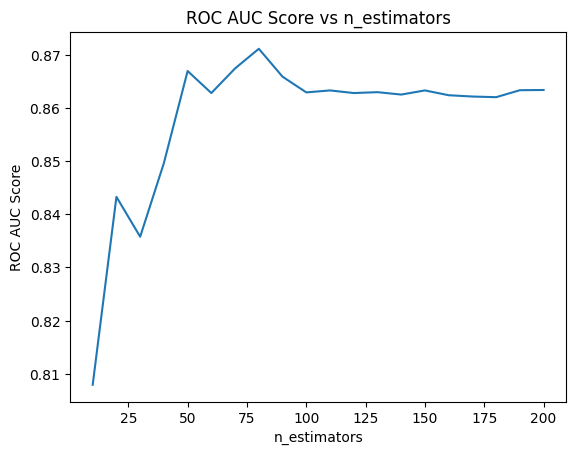

In [99]:
aucs = []

for i in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=i, random_state=42)
    rf.fit(X_train, y_train)
    
    y_pred = rf.predict_proba(X_val)[:,1] # Evaluate the scores
    auc = roc_auc_score(y_val, y_pred)
    print('%s -> %.3f' % (i, auc))

    aucs.append(auc)
plt.xlabel("n_estimators")
plt.ylabel("ROC AUC Score")
plt.title("ROC AUC Score vs n_estimators")
plt.grid(True)
plt.plot(range(10,201,10), aucs)

#### Random Forest Parameter Tuning

10 -> 0.861
20 -> 0.869
30 -> 0.869
40 -> 0.870
50 -> 0.873
60 -> 0.873
70 -> 0.878
80 -> 0.876
90 -> 0.873
100 -> 0.871
110 -> 0.875
120 -> 0.874
130 -> 0.876
140 -> 0.875
150 -> 0.872
160 -> 0.872
170 -> 0.872
180 -> 0.873
190 -> 0.874
200 -> 0.872
10 -> 0.776
20 -> 0.813
30 -> 0.855
40 -> 0.865
50 -> 0.868
60 -> 0.863
70 -> 0.863
80 -> 0.865
90 -> 0.864
100 -> 0.865
110 -> 0.865
120 -> 0.860
130 -> 0.865
140 -> 0.867
150 -> 0.867
160 -> 0.867
170 -> 0.867
180 -> 0.866
190 -> 0.864
200 -> 0.861
10 -> 0.808
20 -> 0.843
30 -> 0.836
40 -> 0.850
50 -> 0.867
60 -> 0.863
70 -> 0.867
80 -> 0.871
90 -> 0.866
100 -> 0.863
110 -> 0.863
120 -> 0.863
130 -> 0.863
140 -> 0.863
150 -> 0.863
160 -> 0.862
170 -> 0.862
180 -> 0.862
190 -> 0.863
200 -> 0.863


Text(0.5, 1.0, 'Random Forest ROC AUC Score vs n_estimators')

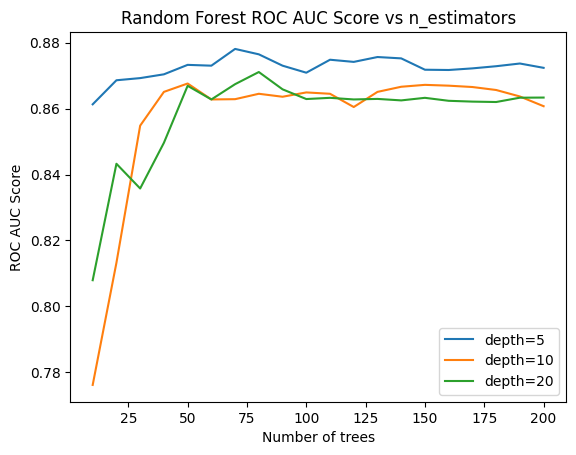

In [109]:
all_aucs = {}

for depth in [5, 10, 20]:
    #print('depth: %s' % depth)
    aucs = []
    for i in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=i, max_depth=depth, random_state=42)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:,1] # Evaluate the scores
        auc = roc_auc_score(y_val, y_pred)
        print('%s -> %.3f' % (i, auc))
        aucs.append(auc)
    all_aucs[depth] = aucs
   
num_trees = list(range(10, 201, 10))
plt.plot(num_trees, all_aucs[5], label='depth=5')
plt.plot(num_trees, all_aucs[10], label='depth=10')
plt.plot(num_trees, all_aucs[20], label='depth=20')
plt.grid(True)

plt.legend()

plt.xlabel("Number of trees")
plt.ylabel("ROC AUC Score")
plt.title("Random Forest ROC AUC Score vs n_estimators")
#plt.plot(range(10,201,10), aucs)

### XGBoost Model

In [90]:
import xgboost as xgb

In [91]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=dv.feature_names_)

In [92]:
dval = xgb.DMatrix(X_val, label=y_val, feature_names=dv.feature_names_)

In [93]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}


In [94]:
model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [95]:
y_pred = model.predict(dval) # The risk score for each employee in the validation dataset

In [96]:
roc_auc_score(y_val, y_pred)

np.float64(0.8149180327868852)

In [ ]:
### Achieved 81.3% straight away with any tuning which is good compared to the AUC-ROC Random Forest values.

### Model Performance Monitoring

In [78]:
watchlist = [(dtrain, 'train'), (dval, 'val')]
scores = {}

In [79]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [87]:
scores['eta=0.3'] = parse_xgb_output(output_03)


In [88]:
%%capture output_03

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5, evals=watchlist)

In [81]:
y_pred = model.predict(dval)

In [82]:
roc_auc_score(y_val, y_pred)

np.float64(0.8315573770491803)

### Achieved 83% straight away with any tuning which is good compared to the AUC-ROC Random Forest values.

In [117]:

%%capture output_001

xgb_params = {
    'eta': 0.01, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5, evals=watchlist)

In [118]:
scores['eta=0.01'] = parse_xgb_output(output_001)

In [119]:
%%capture output_005

xgb_params = {
    'eta': 0.05, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5, evals=watchlist)


In [120]:
scores['eta=0.05'] = parse_xgb_output(output_005)

In [121]:

%%capture output_01

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5, evals=watchlist)

In [122]:
scores['eta=0.1'] = parse_xgb_output(output_01)

In [124]:

%%capture output_02

xgb_params = {
    'eta': 0.2, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5, evals=watchlist)

In [125]:
scores['eta=0.2'] = parse_xgb_output(output_02)

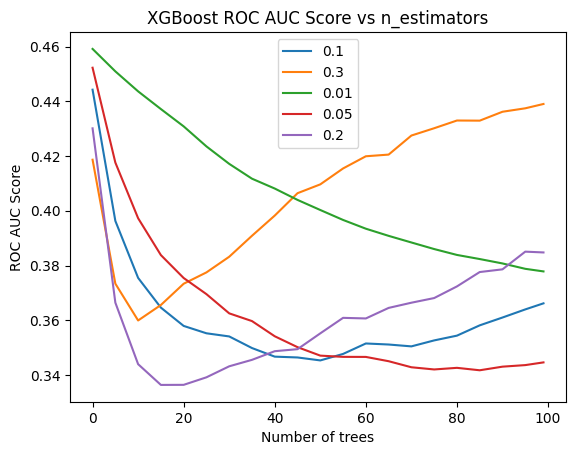

In [126]:
plt.grid(True)plt.plot(scores['eta=0.1'].num_iter, scores['eta=0.1'].val_auc,
        label='0.1')
plt.plot(scores['eta=0.3'].num_iter, scores['eta=0.3'].val_auc,
        label='0.3')
plt.plot(scores['eta=0.01'].num_iter, scores['eta=0.01'].val_auc,
        label='0.01')
plt.plot(scores['eta=0.05'].num_iter, scores['eta=0.05'].val_auc,
        label='0.05')
plt.plot(scores['eta=0.2'].num_iter, scores['eta=0.2'].val_auc,
        label='0.2')
plt.legend()
plt.xlabel("Number of trees")
plt.ylabel("ROC AUC Score")
plt.title("XGBoost ROC AUC Score vs n_estimators")

plt.show()

Best-performing model:

* The orange curve (learning rate = 0.3) achieves the best ROC AUC score at higher 
  n_estimators, making it the most effective configuration for this dataset.
* Lower learning rates may fail to capture the complexity of the data adequately.
* The best learning rate value for the dataset is 0.3.

If still have time, consider the max_depth and Min_child_weight parameters.

### XGBoost Hyper-Parameter Tunning 

In [143]:


xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

In [144]:
model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [145]:
y_pred = model.predict(dval)

In [146]:
roc_auc_score(y_val, y_pred)

np.float64(0.8149180327868852)

#### Selecting the Best Model

In [ ]:
dt = DecisionTreeClassifier(max_depth=10, min_samples_leaf=15)
dt.fit(X_train, y_train)

In [ ]:
y_pred = dt.predict_prob(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

In [ ]:
rf = RandomForestClassifier(n_estimators=200, 
                            max_depth=10,
                            min_samples_leaf=3
                            random_state=42)
rf.fit(X_train, y_train)

In [ ]:
y_pred = rf.predict_prob(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

In [ ]:
# XGBoost
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [ ]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

### Final Training

In [147]:
df_full_train

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,...,performancerating,relationshipsatisfaction,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
1097,24,0,travel_rarely,350,research_&_development,21,2,technical_degree,1551,3,...,3,2,3,2,3,3,1,1,0,0
727,18,0,non-travel,287,research_&_development,5,2,life_sciences,1012,2,...,3,4,0,0,2,3,0,0,0,0
254,29,0,travel_rarely,1247,sales,20,2,marketing,349,4,...,3,4,1,10,2,3,3,2,0,2
1175,39,0,travel_rarely,492,research_&_development,12,3,medical,1654,4,...,4,3,0,7,3,3,5,4,1,0
1341,31,0,travel_rarely,311,research_&_development,20,3,life_sciences,1881,2,...,3,1,1,10,2,3,10,8,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,35,0,travel_rarely,750,research_&_development,28,3,life_sciences,1596,2,...,3,4,2,10,3,2,10,9,6,8
1294,41,0,travel_rarely,447,research_&_development,5,3,life_sciences,1814,2,...,3,1,0,11,3,1,3,2,1,2
860,22,1,travel_frequently,1256,research_&_development,3,4,life_sciences,1203,3,...,3,2,1,1,5,3,0,0,0,0
1459,29,0,travel_rarely,1378,research_&_development,13,2,other,2053,4,...,3,1,1,10,2,3,4,3,0,3


In [ ]:
df_full_train = df_full_train.reset_index(drop=True)

In [ ]:
del df_full_train['attrition']

In [ ]:
dicts_full_train = df_full_train.to_dict(orient='records')

dv = DectVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

dicts_test = df_test.to_dict(orient='records')
X_test = dv.fit_transform(dicts_test)

In [ ]:
dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train, 
                        feature_names=dv.get_feature_names())

dtest = xgb.DMatrix(X_test, feature_names=dv.get_feature_names())

In [ ]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [ ]:
y_pred = model.predict(dtest)

In [ ]:
y_pred[:10]

In [ ]:
roc_auc_score(y_test, y_pred)

In [50]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

In [52]:
features = dv.feature_names_
features = [f.replace('<', 'less ') for f in features]


NameError: name 'df_importances' is not defined

In [ ]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

## Testing - Using the Model

In [ ]:
employee = {'businesstravel': 'travel_rarely',
 'department': 'sales',
 'educationfield': 'life_sciences',
 'gender': 'female',
 'jobrole': 'sales_executive',
 'maritalstatus': 'single',
 'over18': 'y',
 'overtime': 'no',
 'age': 45,
 'dailyrate': 374,
 'distancefromhome': 20,
 'education': 3,
 'employeecount': 1,
 'employeenumber': 2046,
 'environmentsatisfaction': 4,
 'hourlyrate': 50,
 'jobinvolvement': 3,
 'joblevel': 2,
 'jobsatisfaction': 3,
 'monthlyincome': 4850,
 'monthlyrate': 23333,
 'numcompaniesworked': 8,
 'percentsalaryhike': 15,
 'performancerating': 3,
 'relationshipsatisfaction': 3,
 'standardhours': 80,
 'stockoptionlevel': 0,
 'totalworkingyears': 8,
 'trainingtimeslastyear': 3,
 'worklifebalance': 3,
 'yearsatcompany': 5,
 'yearsincurrentrole': 3,
 'yearssincelastpromotion': 0,
 'yearswithcurrmanager': 1,
}

In [ ]:
X_test = dv.transform([employee])
model.predict_proba(X_test)[0, 1]

* Employee details used predicted to remain with the company

In [ ]:
print(list(X_test[0]))

##  Model Evaluation and Tuning

### Accuracy and dummy model
<p>      </p>

In [ ]:
n_splits = 5

for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.attrition.values
        y_val = df_val.attrition.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

In [ ]:
scores

## Full Retrain

In [ ]:
dv, model = train(df_full_train, df_full_train.attrition.values, C=0.5)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
auc

In [ ]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

In [ ]:
aucs = []

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    y_train = df_train.attrition.values

    df_val = df_full_train.iloc[val_idx]
    y_val = df_val.attrition.values

    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)

    rocauc = roc_auc_score(y_val, y_pred)
    aucs.append(rocauc)

In [ ]:
np.array(aucs).round(3)

In [ ]:
print('auc = %0.3f ± %0.3f' % (np.mean(aucs), np.std(aucs)))

## Save Model

In [ ]:
import pickle

In [ ]:
with open ('hrAttrition_Log_model_v3.bin', 'wb') as f_out:
    pickle.dump((dv,model), f_out)